# Tópicos Especiais em Processamento da Informação: Ciência de Dados


## Primeira Avaliação:

Prof. Luiz Affonso Guedes Engenharia de Computação - UFRN 2017-2

Alunos: 
    Gabriel Lucas A. M. Signoretti,
    Miguel Silva da Rocha Junior

Objetivo:

    Análise da base de dados sobre aspectos socio-cuturais de brasileiros adultos (acima de 18 anos). Base de dados da Pesquisa Nacional de Saúde 2013 - IBGE


# Instruções
- Carregue a base de dados: base_pesquisa_nacional_de_saude_2013_IBGE.csv
- Campos (colunas da base de dados)
    - saude_autorreferida (muito_ruim=1, ruim=2, boa=3, muito_boa=4, excelente=5)
    - sexo (masculino=1, feminino=2)
    - idade (idade em anos)
    - cor_raca (branca=1, preta=2, amarela=3, parda=4, indígena=5)
    - e_civil (casado=1, separado_ou_desquitado_judicialmente=2, divorciado=3, viúvo=4, solteiro=5) 
    - nivel_instrucao (pré_escola=1, alfabetização=2, ensino_fundamental=3 e 4, ensino_médio = 5 e 6, graduação=7)
    - sabe_ler_escrever (sim=1, não=2)
    - dirige_carro (sim=1, não=2)
    - dirige_motocicleta (sim=1, não=2)
    - freq_anda_motocicleta (sempre=1, quase_sempre=2, às_vezes=3, raramente=4, nunca=5)
    - aciden_lesao_12meses (sim=1, não=2) - Acidente de trânsito nos últimos 12 meses com lesão.
    - idade_inicio_alcool - idade que começou inferir bebida alcólica. A pergunta não foi feita para todos os participantes da pesquisa. Ainda há o caso de alguns entrevistados que não emgerem bebidas alcólicas, ou não sabiam ou não responderam. Nesses casos, não há valor no campo correspondente.

In [2]:
# importar pandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("carregar a base de dados - base_pesquisa_nacional_de_saude_2013_IBGE.csv")

carregar a base de dados - base_pesquisa_nacional_de_saude_2013_IBGE.csv


In [3]:
df = pd.read_csv("base_pesquisa_nacional_de_saude_2013_IBGE.csv",sep=';')
df.head()

,UF,saude_autorreferida,sexo,idade,cor_raca,e_civil,nivel_instrucao,sabe_ler_escrever,dirige_carro,dirige_motocicleta,freq_anda_motocicleta,aciden_lesao_12meses,idade_inicio_alcool
0,11,3,1,35,2,1,2,2,2,2,5,2,NaN
1,11,2,1,42,4,1,2,1,1,1,2,2,22.0
2,11,2,2,32,2,5,5,1,2,2,1,2,NaN
3,11,2,2,27,1,5,3,1,1,1,5,2,NaN
4,11,3,1,53,2,1,1,1,2,2,5,2,NaN


Questão 1 - Análise sobre idade e estado civil
- Determinar o percentual dos entrevistados por sexo.
- Calcular a idade média dos homens
- Calcular a idade média das mulheres
- Calcular a idade média dos homens casados
- Calcular a idade média das mulheres casadas
- Plotar o histograma das idades das pessoas do sexo masculino
- plotar o histograma das pessoas do sexo feminino


Respostas da Questão 01
Percentual de homens entrevistados: 43.05504800504967%
Percentual de mulheres entrevistadas: 56.94495199495033%
Idade média dos homens: 43.008217592592594
Idade média das mulheres: 43.5439005892305
Idade média dos homens casados: 48.625589836660616
Idade média das mulheres casadas: 44.34226868956843


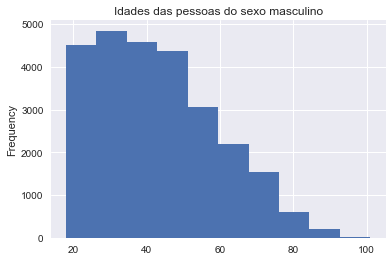

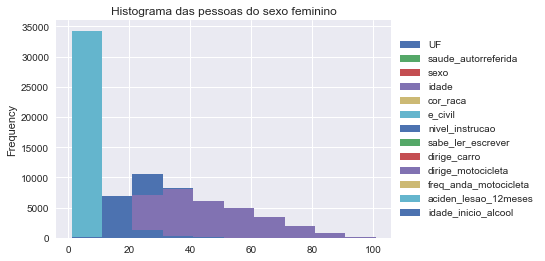

In [4]:
# Questão 01
print("Respostas da Questão 01")

menPercentage = (df[df['sexo']==1].sexo.count())/(df.sexo.count())
womenPercentage = (df[df['sexo']==2].sexo.count())/(df.sexo.count())

print("Percentual de homens entrevistados: {}%".format(menPercentage*100))
print("Percentual de mulheres entrevistadas: {}%".format(womenPercentage*100))

#Calcular a idade média dos homens
manAvgAge = df[df['sexo']==1]['idade'].mean()
print("Idade média dos homens: {}".format(manAvgAge))

#Calcular a idade média das mulheres
womenAvgAge = df[df['sexo']==2]['idade'].mean()
print("Idade média das mulheres: {}".format(womenAvgAge))

#Calcular a idade média dos homens casados
marriedMenAvgAge = df[(df['sexo']==1) & (df['e_civil']==1)]['idade'].mean()
print("Idade média dos homens casados: {}".format(marriedMenAvgAge))

#Calcular a idade média das mulheres casados
marriedWomenAvgAge = df[(df['sexo']==2) & (df['e_civil']==1)]['idade'].mean()
print("Idade média das mulheres casadas: {}".format(marriedWomenAvgAge))

#Plotar o histograma daidades das pessoas do sexo masculino
dfMenAge = df[df['sexo']==1]['idade']
axesMen = dfMenAge.plot(kind='hist') # Using built in pandas data visualization
axesMen.set_title("Idades das pessoas do sexo masculino")


#Plotar o histograma das pessoas do sexo feminino
dfWomenHist = df[df['sexo']==2]
axesWomen = dfWomenHist.plot(kind='hist')
axesWomen.set_title('Histograma das pessoas do sexo feminino')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Questão 2 - Relação da Saúde Autorreferido em função da idade
- calcular a saude_autorreferida média dos homens com idade até 40 anos.
- calcular a saude_autorreferida média das mulheres com idade até 40 anos.
- calcular a saude_autorreferida média dos homens com idade maior ou igual a 41 anos.
- calcular a saude_autorreferida média das mulheres com idade maior ou igual a 41 anos.
- plote os gráficos de caixa (boxplot) para essas 04 análises.

In [11]:
# Questão 02
print("Respostas da Questão 02")

saudeMediaHomensAte40 = df[(df['sexo']==1) & (df['idade'] <= 40)]['saude_autorreferida'].mean()
saudeMediaMulheresAte40 = df[(df['sexo']==2) & (df['idade'] <= 40)]['saude_autorreferida'].mean()
saudeMediaHomensMais41 = df[(df['sexo']==1) & (df['idade'] >= 41)]['saude_autorreferida'].mean()
saudeMediaMulheresMais41 = df[(df['sexo']==2) & (df['idade'] >= 41)]['saude_autorreferida'].mean()

print("saude_autorreferida média dos homens com idade até 40 anos: {}".format(saudeMediaHomensAte40))
print("saude_autorreferida média das mulheres com idade até 40 anos: {}".format(saudeMediaMulheresAte40))
print("saude_autorreferida média dos homens com idade maior ou igual a 41 anos: {}".format(saudeMediaHomensMais41))
print("saude_autorreferida média das mulheres com idade maior ou igual a 41 anos: {}".format(saudeMediaMulheresMais41))

data = {'Homens até 40 anos': saudeMediaHomensAte40,
        'Homens com mais de 40 anos': saudeMediaHomensMais41,
        'Mulheres até 40 anos': saudeMediaMulheresAte40,
        'Mulheres mais de 40 anos': sau}

newDf = pd.DataFrame(data=data, index=['Results'], columns=['YougMan','AdultMan','YougWomen','AdultWomen'])
ax = newDf.plot(kind='bar')
ax.set_ylabel('%')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Respostas da Questão 02
saude_autorreferida média dos homens com idade até 40 anos: 2.0345283459055916
saude_autorreferida média das mulheres com idade até 40 anos: 2.155020551967117
saude_autorreferida média dos homens com idade maior ou igual a 41 anos: 2.4298292626904523
saude_autorreferida média das mulheres com idade maior ou igual a 41 anos: 2.5540806862972407


Questão 3 - Nível de Instrução em função de idade e sexo
- calcular o nível de instrução (nivel_instrucao) médio dos homens com idade até 40 anos.
- calcular o nível de instrução (nivel_instrucao) médio das mulheres com idade até 40 anos.
- calcular o nível de instrução (nivel_instrucao) médio dos homens com idade maior ou igual a 41 anos.
- calcular o nível de instrução (nivel_instrucao) médio das mulheres com idade maior ou igual a 41 anos.
- plotar os gráficos de caixa (boxplot) para essas 04 análises.

Respostas da Questão 03
Nível de instrução médio de homens com até 40 anos: 4.122871140835213
Nível de instrução médio de mulheres com até 40 anos: 4.304697592483852
Nível de instrução médio de homens acima de 41 anos: 3.1195161166832555
Nível de instrução médio de mulheres acima de 41 anos: 3.2287850683978667


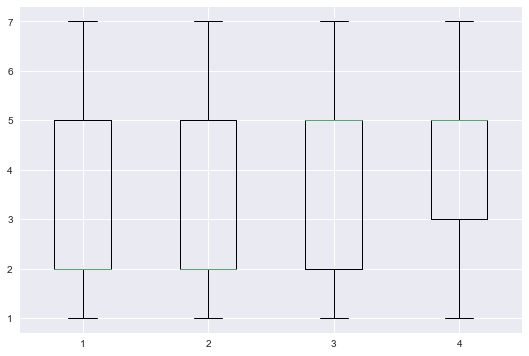

In [84]:
# Questão 03
print("Respostas da Questão 03")

#calcular o nível de instrução (nivel_instrucao) médio dos homens com idade até 40 anos.
nivelInstMedioMen = df[(df['sexo']==1) & (df['idade'] <= 40)].nivel_instrucao.mean()
print("Nível de instrução médio de homens com até 40 anos: {}".format(nivelInstMedioMen))

#calcular o nível de instrução (nivel_instrucao) médio dos homens com idade até 40 anos.
nivelInstMedioWomen = df[(df['sexo']==2) & (df['idade'] <= 40)].nivel_instrucao.mean()
print("Nível de instrução médio de mulheres com até 40 anos: {}".format(nivelInstMedioWomen))

# calcular o nível de instrução (nivel_instrucao) médio dos homens com idade maior ou igual a 41 anos.
nivelInstMedioMen2 = df[(df['sexo']==1) & (df['idade'] >= 41)].nivel_instrucao.mean()
print("Nível de instrução médio de homens acima de 41 anos: {}".format(nivelInstMedioMen2))

# calcular o nível de instrução (nivel_instrucao) médio das mulheres com idade maior ou igual a 41 anos.
nivelInstMedioWomen2 = df[(df['sexo']==2) & (df['idade'] >= 41)].nivel_instrucao.mean()
print("Nível de instrução médio de mulheres acima de 41 anos: {}".format(nivelInstMedioWomen2))

#plotar os gráficos de caixa (boxplot) para essas 04 análises.
manOverFourtyOne = df[(df['sexo']==1) & (df['idade'] >= 41)].nivel_instrucao
womenOverFourtyOne = df[(df['sexo']==2) & (df['idade'] >= 41)].nivel_instrucao

manUpToFourty = df[(df['sexo']==1) & (df['idade'] <= 40)].nivel_instrucao
womenUpToFourty = df[(df['sexo']==2) & (df['idade'] <= 40)].nivel_instrucao


data = [np.array(manOverFourtyOne),
        np.array(womenOverFourtyOne),
        np.array(manUpToFourty),
        np.array(womenUpToFourty)]

fig = plt.figure(1, figsize=(9,6))
axes = fig.add_subplot(111)
boxplot = axes.boxplot(data)

Questão 4 - Nível de Instrução em função de idade e sexo
- Determine se há correlação entre sexo e nível de instrução (nivel_instrucao).
- Determine se há correlação entre raça (cor_raca) e nível de instrução (nivel_instrucao).
- Determine se há correlação entre sexo e dirige_motocicleta.
- Apresente os resultados de forma gráfica.

Respostas da Questão 04 

Há uma correlação mas ela é de 0.036047. Isto é, uma correlação irrelevante.
Não há uma correlação. Os resultados para tal foram negativos.
Há uma correlação de 0.34 entre . Os resultados para tal foram negativos.


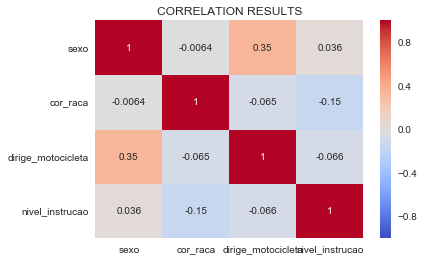

In [100]:
# Questão 04
print("Respostas da Questão 04 \n")

#Determine se há correlação entre sexo e nível de instrução (nivel_instrucao).
df[['sexo','nivel_instrucao']].corr()
print("Há uma correlação mas ela é de 0.036047. Isto é, uma correlação irrelevante.")

df[['cor_raca','nivel_instrucao']].corr()
print("Não há uma correlação. Os resultados para tal foram negativos.")

df[['sexo', 'dirige_motocicleta']].corr()
print("Há uma correlação de 0.34 entre . Os resultados para tal foram negativos.")

correlationDf = df[['sexo','cor_raca', 'dirige_motocicleta' , 'nivel_instrucao']]
correlationDf

sns.heatmap(correlationDf.corr(), cmap='coolwarm', annot=True)
plt.title('CORRELATION RESULTS')

Questão 5 - Perfil dos motoristas de motocicletas
- Considere "Jovem" pessoas com idade até 35 anos e "Adulto" pessoas com idade igual ou maior que 36 anos.
- Determine o percentual de homens Jovens que dirigem motocicleta
- Determine o percentual de homens Adultos que dirigem motocicleta
- Determine o percentual de mulheres Jovens que dirigem motocicleta
- Determine o percentual de mulheres Adultas que dirigem motocicleta
- Plote esses 04 resultados num gráfico de barras

Respostas da Questão 05
57.295836669335465% of young men are driving motorciles
51.57125700560449% of adult men are driving motorciles
29.283426741393114% of young women are driving motorciles
11.178943154523619% of adult women are driving motorciles


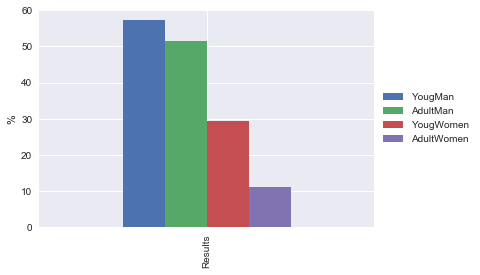

In [103]:
# Questão 05
print("Respostas da Questão 05")
 
percentageYoungManDrivingMotorcicles = df[(df['sexo']==1) & (df['idade'] <= 35) & (df['dirige_motocicleta']==1)].sexo.count()/df[(df['sexo']==1) & (df['idade'] <= 35)].sexo.count() 
print("{}% of young men are driving motorciles".format(percentageYoungManDrivingMotorcicles*100))

percentageAdultManDrivingMotorcicles = df[(df['sexo']==1) & (df['idade'] > 35) & (df['dirige_motocicleta']==1)].sexo.count()/df[(df['sexo']==1) & (df['idade'] <= 35)].sexo.count() 
print("{}% of adult men are driving motorciles".format(percentageAdultManDrivingMotorcicles*100))

percentageYountWomenDrivingMotorcicles = df[(df['sexo']==2) & (df['idade'] <= 35) & (df['dirige_motocicleta']==1)].sexo.count()/df[(df['sexo']==1) & (df['idade'] <= 35)].sexo.count() 
print("{}% of young women are driving motorciles".format(percentageYountWomenDrivingMotorcicles*100))

percentageAdultWomenDrivingMotorcicles = df[(df['sexo']==2) & (df['idade'] > 35) & (df['dirige_motocicleta']==1)].sexo.count()/df[(df['sexo']==1) & (df['idade'] <= 35)].sexo.count() 
print("{}% of adult women are driving motorciles".format(percentageAdultWomenDrivingMotorcicles*100))

data = {'YougMan': percentageYoungManDrivingMotorcicles*100,
        'AdultMan': percentageAdultManDrivingMotorcicles*100,
        'YougWomen': percentageYountWomenDrivingMotorcicles*100,
        'AdultWomen': percentageAdultWomenDrivingMotorcicles*100}

newDf = pd.DataFrame(data=data, index=['Results'], columns=['YougMan','AdultMan','YougWomen','AdultWomen'])
ax = newDf.plot(kind='bar')
ax.set_ylabel('%')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Questão 6 - Perfil dos motoristas de motocicletas
- Determine o percentual de pessoas que utilizam motocilceta sempre ou quase sempre (freq_anda_motocicleta <= 2) e que sofreram acidente nos últimos 12 meses (aciden_lesao_12meses ==1).
- Determine o percentual de pessoas que não utilizam frequentemente motocilceta (freq_anda_motocicleta >= 3) e que sofreram acidente nos últimos 12 meses (aciden_lesao_12meses ==1).
- Apresente os resultados em gráfico de barras.

Respostas da Questão 06
O percentual de pessoas que utilizam motocilceta sempre ou quase sempre e que sofreram acidente nos últimos 12 meses é de 1.420218597388791%
O percentual de pessoas que não utilizam frequentemente motocilceta e que sofreram acidente nos últimos 12 meses é de 1.5431381017241952%


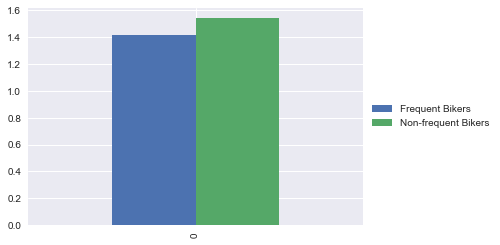

In [104]:
# Questão 06
print("Respostas da Questão 06")

# To see how many rows has a pandas DataFrame, reference to https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
# DataFrame.shape[0] -> shape function returns a tuple (rows, columns). Add [0] to access rows

firstPrcnt = df[(df['dirige_motocicleta']==1) & (df['freq_anda_motocicleta'] <=2) & (df['aciden_lesao_12meses']==1)].shape[0]/df.shape[0] 
print("O percentual de pessoas que utilizam motocilceta sempre ou quase sempre e que sofreram acidente nos últimos 12 meses é de {}%".format(firstPrcnt*100))

scondPrcnt = df[(df['freq_anda_motocicleta'] >=3) & (df['aciden_lesao_12meses']==1)].shape[0]/df.shape[0]
print("O percentual de pessoas que não utilizam frequentemente motocilceta e que sofreram acidente nos últimos 12 meses é de {}%".format(scondPrcnt*100))

data = {'Frequent Bikers': firstPrcnt*100,
        'Non-frequent Bikers': scondPrcnt*100}

newDf = pd.DataFrame(data=data, index=[0], columns=['Frequent Bikers','Non-frequent Bikers'])
newDf.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Questão 7 - Perfil sobre consumo de alcool

- Calcule a idade média que os homens começam a consumir alcool (idade_inicio_alcool)
- Calcule a idade média que as mulheres começam a consumir alcool (idade_inicio_alcool)
- Calcule a idade média que os homens começam a consumir alcool (idade_inicio_alcool) em função do nível de instrução (nivel_instrucao)
   - Considerar:
       - nivel_superior SE nivel_instrucao == 7
       - nivel_medio SE nivel_instrucao == 5 OU 6
       - nivel_basico SE nivel_intrucao < 5
- Apresente o resultado de em forma gráfica
 
OBS. Atenção. Nem todos os entrevistados foram questionados sobre o item "idade_inicio_alcool".

Respostas da Questão 07
A idade média que os homens começam a consumir alcool é de: 17.821967348625748%
A idade média que as mulheres começam a consumir alcool é de: 20.55211726384365%


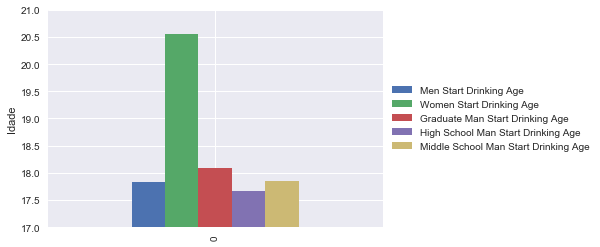

In [105]:
# Questão 07
print("Respostas da Questão 07")

# Calcule idade média que os homens começam a consumir alcool (idade_inicio_alcool)
avgAgeMenStartDrinkAlcohol = df[(df['idade_inicio_alcool'].notnull()) & 
                                (df['sexo'] == 1)].idade_inicio_alcool.mean()
print("A idade média que os homens começam a consumir alcool é de: {}%".format(avgAgeMenStartDrinkAlcohol))

# Calcule a idade média que as mulheres começam a consumir alcool (idade_inicio_alcool)
avgAgeWomenStartDrinkAlcohol = df[(df['idade_inicio_alcool'].notnull()) & 
                                  (df['sexo'] == 2)].idade_inicio_alcool.mean()
print("A idade média que as mulheres começam a consumir alcool é de: {}%".format(avgAgeWomenStartDrinkAlcohol))

manDrinkingAgeForGrad = df[(df['idade_inicio_alcool'].notnull()) & 
                           (df['sexo'] == 1) & 
                           (df['nivel_instrucao']==7)
                          ].idade_inicio_alcool.mean()

manDrinkingAgeForHighSchool = df[(df['idade_inicio_alcool'].notnull()) & 
                              (df['sexo'] == 1) & 
                              ((df['nivel_instrucao']==5) | (df['nivel_instrucao']==6))
                             ].idade_inicio_alcool.mean()

manDrinkingAgeForMidSchool = df[(df['idade_inicio_alcool'].notnull()) & 
                           (df['sexo'] == 1) & 
                           (df['nivel_instrucao'] < 5)
                          ].idade_inicio_alcool.mean()

data = {'Men Start Drinking Age': avgAgeMenStartDrinkAlcohol,
        'Women Start Drinking Age': avgAgeWomenStartDrinkAlcohol,
        'Graduate Man Start Drinking Age': manDrinkingAgeForGrad,
        'High School Man Start Drinking Age': manDrinkingAgeForHighSchool,
        'Middle School Man Start Drinking Age': manDrinkingAgeForMidSchool}

newDf = pd.DataFrame(data=data, index=[0], columns=list(data.keys()))

# Using Pandas Built in visualization
axes = newDf.plot(kind='bar')
axes.set_ylabel('Idade')
axes.set_ybound(lower=17, upper=21) # Limitar o eixo y(idade)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Questão 8 - Proponha e resolva uma questão que use os dados dessa base de dados. Serão considerados os seguintes aspectos:
- pertinência e relevância da questão.
- corretude da resposta.

Respostas da Questão 08


,cor_raca,nivel_instrucao
cor_raca,1.000000,-0.151482
nivel_instrucao,-0.151482,1.000000


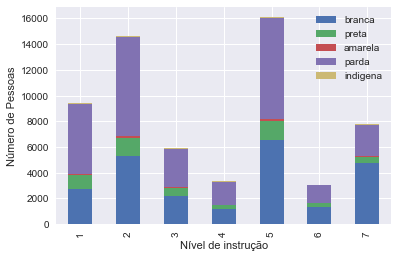

In [109]:
# Questão 08

# 
#   A análise será entre raça e nível de instrução. Quer-se saber como as proporções raciais
# se dão dentre os níveis de instrução. Este dado pode ajudar a entender a distribuição racial
# dentre as pessoas mais escolarizadas ou não.

print("Respostas da Questão 08")

# cor_raca (branca=1, preta=2, amarela=3, parda=4, indígena=5)
# nivel_instrucao (pré_escola=1, alfabetização=2, ensino_fundamental=3 e 4, ensino_médio = 5 e 6, graduação=7)

raceInstruc = df[['cor_raca','nivel_instrucao']]

brancaByInstrctn = raceInstruc[(df['cor_raca']==1)].groupby('nivel_instrucao').count()['cor_raca'].values # Get white people count by Instruction
pretaByInstrctn = raceInstruc[(df['cor_raca']==2)].groupby('nivel_instrucao').count()['cor_raca'].values # Get black people count by Instruction
amarelaByInstrctn = raceInstruc[(df['cor_raca']==3)].groupby('nivel_instrucao').count()['cor_raca'].values # Get yellow people count by Instruction
pardaByInstrctn = raceInstruc[(df['cor_raca']==4)].groupby('nivel_instrucao').count()['cor_raca'].values # Get pardo people count by Instruction
indigenaByInstrctn = raceInstruc[(df['cor_raca']==5)].groupby('nivel_instrucao').count()['cor_raca'].values # Get white people count by Instruction

data = {'branca': brancaByInstrctn,
        'preta': pretaByInstrctn,
        'amarela': amarelaByInstrctn,
        'parda': pardaByInstrctn,
        'indigena': indigenaByInstrctn}

index = np.sort(raceInstruc['nivel_instrucao'].unique())

newDf = pd.DataFrame(data=data, index=index, columns=list(data.keys()))

# Using Pandas built in Data Visualization
ax = newDf.plot(kind='bar', stacked=True)
ax.set_xlabel('Nível de instrução')
ax.set_ylabel('Número de Pessoas')

raceInstruc.corr()


#  Pelo gráfico de barras, percebe-se que a propoção de pessoas brancas em relação as demais
# aumenta bastante. Entretanto, não é possível dizer que há uma ligação direta entre ser uma
# pessoa branca e ser uma pessoa mais instruída. Os dados de correlação mostraram uma correlação
# negativa entre essas variáveis.